# Avance del proyecto
### Detección de Automobiles Mediante AUV Basado en Transfer learning
### Image_Preprocessing

In [1]:
'''Librerias'''
import cv2
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import h5py
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL  import Image
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
from time import sleep

In [2]:
'''Dataset'''
images_path = "C:/Users/Junior/Desktop/Proyecto mineria/Dataset/"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['car', 'motor','trunk']


In [3]:
'''Copia de datos a documento final'''
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    elements = os.listdir(cur_path)
    
    for element in elements:
        print("DataAum - {} testAum/{}".format(element, class_name))
        src = os.path.join(images_path + "/" + class_name, element) # origen
        dst = os.path.join("C:/Users/Junior/Desktop/Proyecto mineria/Dataset_Aum/" + class_name, element) 
        shutil.copy(src, dst)

DataAum - (1116).jpg testAum/car
DataAum - (1117).jpg testAum/car
DataAum - (1128).jpg testAum/car
DataAum - (1129).jpg testAum/car
DataAum - (1130).jpg testAum/car
DataAum - (1131).jpg testAum/car
DataAum - (1134).jpg testAum/car
DataAum - (1137).jpg testAum/car
DataAum - (1138).jpg testAum/car
DataAum - (1139).jpg testAum/car
DataAum - (1674).jpg testAum/motor
DataAum - (1675).jpg testAum/motor
DataAum - (1677).jpg testAum/motor
DataAum - (1683).jpg testAum/motor
DataAum - (1684).jpg testAum/motor
DataAum - (1685).jpg testAum/motor
DataAum - (1686).jpg testAum/motor
DataAum - (1687).jpg testAum/motor
DataAum - (1688).jpg testAum/motor
DataAum - (1689).jpg testAum/motor


In [4]:
'''Aumento de datos'''
datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [5]:
'''Datos del car'''
os.chdir(r"C:/Users/Junior/Desktop/Proyecto mineria/Dataset_Aum/car")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)   
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'car', 
            save_format='jpg'):
        i += 1
        if i == 5:     
            break 

In [6]:
'''Datos de motor'''
os.chdir(r"C:/Users/Junior/Desktop/Proyecto mineria/Dataset_Aum/motor")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'motor', 
            save_format='jpg'):
        i += 1
        if i == 5:     ## creates 10 image form 1 image 
            break 

In [8]:
'''NLM Filter for image denoising'''
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # lectura de datos
        image = cv2.imread(file)
        # denoising images
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # guardar imagenes
        save_path = 'C:/Users/Junior/Desktop/Proyecto mineria/Dataset_Aum/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))

        # mostrar proceso
        i += 1

Processing Image - 1 in car
Processing Image - 2 in car
Processing Image - 3 in car
Processing Image - 4 in car
Processing Image - 5 in car
Processing Image - 6 in car
Processing Image - 7 in car
Processing Image - 8 in car
Processing Image - 9 in car
Processing Image - 10 in car
Processing Image - 11 in car
Processing Image - 12 in car
Processing Image - 13 in car
Processing Image - 14 in car
Processing Image - 15 in car
Processing Image - 16 in car
Processing Image - 17 in car
Processing Image - 18 in car
Processing Image - 19 in car
Processing Image - 20 in car
Processing Image - 21 in car
Processing Image - 22 in car
Processing Image - 23 in car
Processing Image - 24 in car
Processing Image - 25 in car
Processing Image - 26 in car
Processing Image - 27 in car
Processing Image - 28 in car
Processing Image - 29 in car
Processing Image - 30 in car
Processing Image - 31 in car
Processing Image - 32 in car
Processing Image - 33 in car
Processing Image - 34 in car
Processing Image - 35 i

In [9]:
'''Remover fondo'''
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # remove bg 
        output = remove(image)
        # save images
        save_path = 'C:/Users/Junior/Desktop/Proyecto mineria/Dataset_Aum_Black/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        
        # mostrar proceso
        i += 1

Processing Image - 1 in car
Processing Image - 2 in car
Processing Image - 3 in car
Processing Image - 4 in car
Processing Image - 5 in car
Processing Image - 6 in car
Processing Image - 7 in car
Processing Image - 8 in car
Processing Image - 9 in car
Processing Image - 10 in car
Processing Image - 11 in car
Processing Image - 12 in car
Processing Image - 13 in car
Processing Image - 14 in car
Processing Image - 15 in car
Processing Image - 16 in car
Processing Image - 17 in car
Processing Image - 18 in car
Processing Image - 19 in car
Processing Image - 20 in car
Processing Image - 21 in car
Processing Image - 22 in car
Processing Image - 23 in car
Processing Image - 24 in car
Processing Image - 25 in car
Processing Image - 26 in car
Processing Image - 27 in car
Processing Image - 28 in car
Processing Image - 29 in car
Processing Image - 30 in car
Processing Image - 31 in car
Processing Image - 32 in car
Processing Image - 33 in car
Processing Image - 34 in car
Processing Image - 35 i

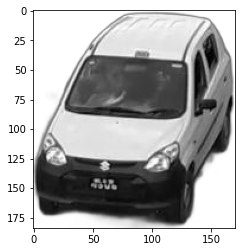

In [14]:
'''Data img'''
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('C:/Users/Junior/Desktop/Proyecto mineria/Dataset_Aum_Black/car/car_3.png')
imgplot = plt.imshow(img)
plt.show()